ASSIGNMENT | 10.2
--- | ---
Name: | **Feliciano, Kurt Martin**<br>
Course and Section: | **CPE 019 - CPE32S3**<br>
Date Submitted: | **05-03-2024**<br>
Instructor: | **Engr. Roman Richard**<br>
<hr> | <hr>


<ipython-input-1-1f703dc1e0f3>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


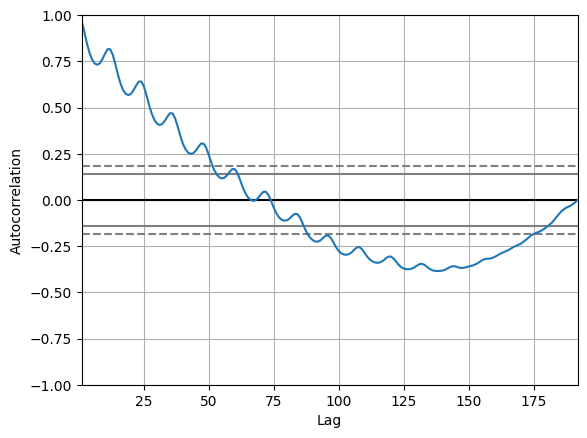

In [ ]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
T
def parser(x):
	return datetime.strptime(x, '%Y-%m')

series = read_csv('/content/data.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

<h2> <b> == FIT AN ARIMA MODEL ==

In [ ]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# fit model
model = ARIMA(series, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Thu, 02 May 2024   AIC                            457.638
Time:                        13:49:04   BIC                            467.395
Sample:                    01-31-1965   HQIC                           461.590
                         - 12-31-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

In [ ]:
residuals = DataFrame(model_fit.resid)
print(residuals.describe())

                0
count  192.000000
mean     1.698162
std     23.055889
min     -1.760398
25%     -0.571139
50%      0.034938
75%      0.566208
max    319.320000


<h2><b> == IMPROVE THE ARIMA MODEL ==

In [ ]:
from sklearn.metrics import mean_squared_error
import warnings
from math import sqrt

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=8.375
ARIMA(0, 0, 1) RMSE=4.310
ARIMA(0, 0, 2) RMSE=2.611
ARIMA(0, 1, 0) RMSE=1.220
ARIMA(0, 1, 1) RMSE=0.901
ARIMA(0, 1, 2) RMSE=0.757
ARIMA(0, 2, 0) RMSE=0.935
ARIMA(0, 2, 1) RMSE=0.901
ARIMA(0, 2, 2) RMSE=0.878
ARIMA(1, 0, 0) RMSE=1.236
ARIMA(1, 0, 1) RMSE=0.913
ARIMA(1, 0, 2) RMSE=0.771
ARIMA(1, 1, 0) RMSE=0.867
ARIMA(1, 1, 1) RMSE=0.808
ARIMA(1, 1, 2) RMSE=0.742
ARIMA(1, 2, 0) RMSE=0.898
ARIMA(1, 2, 1) RMSE=0.898
ARIMA(1, 2, 2) RMSE=0.810
ARIMA(2, 0, 0) RMSE=0.891
ARIMA(2, 0, 1) RMSE=0.830
ARIMA(2, 0, 2) RMSE=0.765
ARIMA(2, 1, 0) RMSE=0.746
ARIMA(2, 1, 1) RMSE=0.662
ARIMA(2, 1, 2) RMSE=0.665
ARIMA(2, 2, 0) RMSE=0.897
ARIMA(2, 2, 1) RMSE=0.751
ARIMA(2, 2, 2) RMSE=0.746
ARIMA(4, 0, 0) RMSE=0.715
ARIMA(4, 0, 1) RMSE=0.670
ARIMA(4, 0, 2) RMSE=0.651
ARIMA(4, 1, 0) RMSE=0.707
ARIMA(4, 2, 0) RMSE=0.815
ARIMA(4, 2, 1) RMSE=0.790
ARIMA(4, 2, 2) RMSE=0.731
ARIMA(6, 0, 0) RMSE=0.709
ARIMA(6, 0, 1) RMSE=0.721
ARIMA(6, 1, 0) RMSE=0.610
ARIMA(6, 1, 1) RMSE=0.558
ARIMA(6, 1, 

<h2> <b> == MAKE A FORECAST ==

In [ ]:
# Splitting into train and test sets
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (9,2,0))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(series), len(series)+10, typ = 'levels')

print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

<h2> <b> == PLOT THE FORECAST ==

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

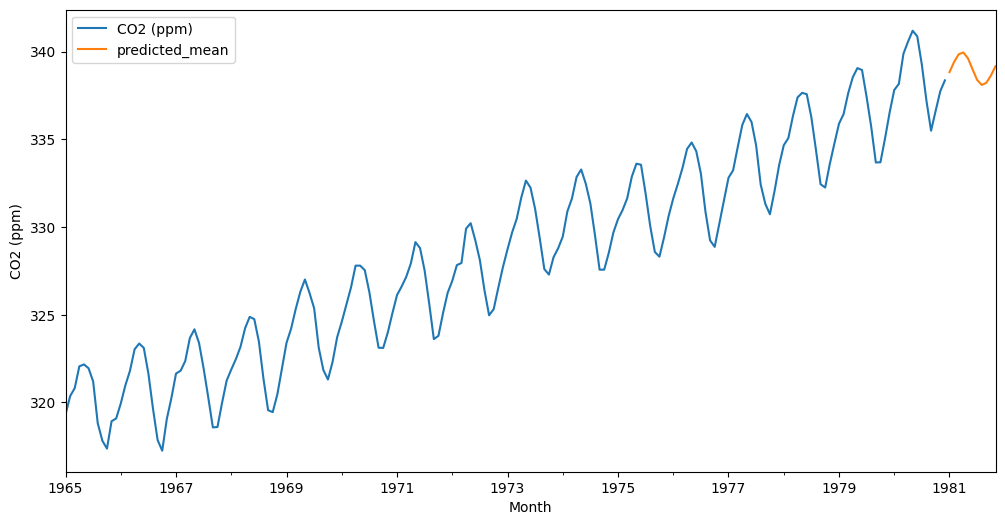

In [ ]:
ylabel='CO2 (ppm)'
xlabel='Month'

ax = series.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

<h2> <b> == MAKE A GRID SEARCH ==

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(series) * 0.75)
  train_data, test_data = series[0:train_size], series[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(series), len(series)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(series, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.208
ARIMA(0, 3, 2) MSE=945.481
ARIMA(0, 3, 3) MSE=1022.852
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.356
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.275
ARIMA(1, 3, 0) MSE=75819.084
ARIMA(1, 3, 1) MSE=1087.634
ARIMA(1, 3, 2) MSE=1026.289
ARIMA(1, 3, 3) MSE=1016.551
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.992
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

<h1> <b> == SUPPLEMENTARY ACTIVITY ==

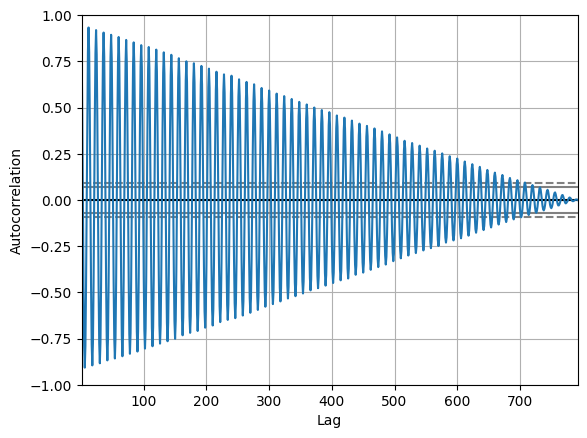

In [ ]:
def parser(x):
	return datetime.strptime(x, '%Y-%m')

series_supple = read_csv('/content/dataset_temperature.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

In [ ]:
# fit model
model = ARIMA(series_supple, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2773.596
Date:                      Fri, 03 May 2024   AIC                           5553.192
Time:                              06:46:47   BIC                           5567.212
Sample:                          01-01-1907   HQIC                          5558.581
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.060      9.104      0.000       0.428       0.663
ma.L1         -0.0333      0.072     -0.462      0.644      -0.174       0.108
sigm

In [ ]:
residuals = DataFrame(model_fit.resid)
print(residuals.describe())

                0
count  792.000000
mean     0.033157
std      8.152946
min    -22.090284
25%     -5.966691
50%     -0.197062
75%      5.394914
max     33.300000


In [ ]:
# Splitting into train and test sets
train_size = int(len(series) * 0.75)
train_data, test_data = series[0:train_size], series[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (3,0,3))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(series), len(series)+10, typ = 'levels')

print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  15.662469948959755
RMSE:  3.9575838524230607


In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(series_supple) * 0.75)
  train_data, test_data = series_supple[0:train_size], series_supple[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(series_supple), len(series_supple)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(series_supple, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(series_supple.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=244.680
ARIMA(0, 0, 1) MSE=243.522
ARIMA(0, 0, 2) MSE=241.414
ARIMA(0, 0, 3) MSE=240.950
ARIMA(0, 1, 0) MSE=495.038
ARIMA(0, 1, 1) MSE=563.035
ARIMA(0, 1, 2) MSE=762.177
ARIMA(0, 1, 3) MSE=241.417
ARIMA(0, 2, 0) MSE=1244065.976
ARIMA(0, 2, 1) MSE=1228064.280
ARIMA(0, 2, 2) MSE=1375959.214
ARIMA(0, 2, 3) MSE=1226.256
ARIMA(0, 3, 0) MSE=75530369.710
ARIMA(0, 3, 1) MSE=1146838.733
ARIMA(0, 3, 2) MSE=1228565.660
ARIMA(0, 3, 3) MSE=1377435.736
ARIMA(1, 0, 0) MSE=244.502
ARIMA(1, 0, 1) MSE=242.878
ARIMA(1, 0, 2) MSE=242.032
ARIMA(1, 0, 3) MSE=241.498
ARIMA(1, 1, 0) MSE=927.784
ARIMA(1, 1, 1) MSE=967.960
ARIMA(1, 1, 2) MSE=242.927
ARIMA(1, 1, 3) MSE=242.089
ARIMA(1, 2, 0) MSE=1304343.983
ARIMA(1, 2, 1) MSE=1337791.293
ARIMA(1, 2, 2) MSE=1669.403
ARIMA(1, 2, 3) MSE=1745.212
ARIMA(1, 3, 0) MSE=348687748.241
ARIMA(1, 3, 1) MSE=1318901.869
ARIMA(1, 3, 2) MSE=1359081.389
ARIMA(1, 3, 3) MSE=1237604.102
ARIMA(2, 0, 0) MSE=235.314
ARIMA(2, 0, 1) MSE=184.648
ARIMA(2, 0, 2) MSE=16.30

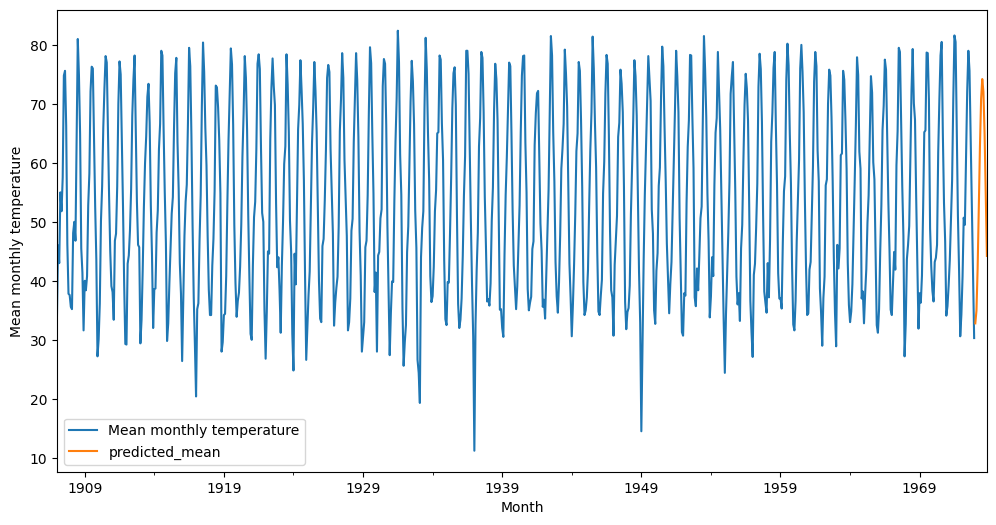

In [ ]:
ylabel='Mean monthly temperature'
xlabel='Month'

ax = series_supple.plot(legend=True,figsize=(12,6))
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

<h2> <b> == CONCLUSION ==

- After performing this activity I have learned how to work with ARIMA models, which is capable of capturing time series patterns, which enables us humans to have more accurate predictions regarding specific topics, depending on the data being fed to the model. Though this can be a lengthy process that may need some time to see which model order would be best, performing a grid search completely takes on that issue as it gives us an instant feedback on which one has the lowest MSE, which is extremely convenient. I found interesting that the same code worked for both csv files, which implies that the code used for this activity is extremely flexible and versatile, needing little to no modifications to work for other datasets.